In [1]:
import sys

sys.path.append('../gtm/')
sys.path.append('../simulation/')

In [2]:
sys.path

['/Users/shim-kojio/Desktop/internship/codes/notebook',
 '/Users/shim-kojio/.pyenv/versions/3.9.10/lib/python39.zip',
 '/Users/shim-kojio/.pyenv/versions/3.9.10/lib/python3.9',
 '/Users/shim-kojio/.pyenv/versions/3.9.10/lib/python3.9/lib-dynload',
 '',
 '/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages',
 '../gtm/',
 '../src/']

In [3]:
import importlib
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import pickle
import numpy as np
from random import random
from tqdm import tqdm

import torch
import pandas as pd

from corpus import GTMCorpus
from gtm import GTM
from sim_gtm import generate_docs_by_gtm, estimate_dist_by_gtm
from sim_lda import generate_docs_by_lda, estimate_dist_by_lda


/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### check lambda and sigma with 4 topics
- set the true_lambda and true_sigma
- estimate lambda and sigma (*100 times)

#### logistic_normal_mlp (update_prior=True)

In [4]:
num_topics = 4
num_iters = 10
seed = 0
np.random.seed(seed)
doc_args = {
    "num_content_covs": 2,
    "num_prev_covs": 2,
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
}
gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "logistic_normal",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        # "seed":seed
        }

### setting the true_lambda
true_lambda_ = np.random.rand(doc_args["num_content_covs"], num_topics)
true_lambda_ = true_lambda_ - true_lambda_[:, 0][:, None]

sqrt_sigma = np.random.rand(num_topics, num_topics)
true_sigma = sqrt_sigma * sqrt_sigma.T


### generating docs

print("generate docs")
df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
    num_topics=num_topics,
    doc_topic_prior=gtm_model_args["doc_topic_prior"],
    decoder_type=gtm_model_args["decoder_type"],
    seed=seed,
    update_prior=gtm_model_args["update_prior"],
    lambda_=true_lambda_,
    sigma=true_sigma,
    doc_args=doc_args,
    is_output=False,
)
print()
print("estimate lambda, sigma")
estimated_lambda_list = []
estimated_sigma_list = []
for i in tqdm(range(num_iters)):
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    gtm_model_args["seed"] = i
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    estimated_lambda_list.append(tm_test.prior.lambda_)
    estimated_sigma_list.append(tm_test.prior.sigma)
    if i % 10 == 0:
        print("finished {} epochs".format(i))
# mean_estimated_lambda = np.mean(estimated_lambda_list, axis=0)

generate docs


100%|██████████| 5000/5000 [01:03<00:00, 79.12it/s]



estimate lambda, sigma


  0%|          | 0/10 [00:00<?, ?it/s]


Epoch   1	Mean Training Loss:5.4930913

Topic_0: ['word_354', 'word_985', 'word_912', 'word_462', 'word_983']
Topic_1: ['word_912', 'word_354', 'word_430', 'word_37', 'word_340']
Topic_2: ['word_983', 'word_781', 'word_209', 'word_32', 'word_270']
Topic_3: ['word_912', 'word_985', 'word_103', 'word_781', 'word_983']
Intercept: ['word_781', 'word_32', 'word_354', 'word_912', 'word_983']
content: ['word_764', 'word_292', 'word_983', 'word_781', 'word_549']



Epoch   2	Mean Training Loss:0.9588159

Topic_0: ['word_354', 'word_781', 'word_985', 'word_912', 'word_430']
Topic_1: ['word_354', 'word_781', 'word_912', 'word_430', 'word_985']
Topic_2: ['word_781', 'word_983', 'word_292', 'word_549', 'word_354']
Topic_3: ['word_781', 'word_985', 'word_912', 'word_354', 'word_983']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_764', 'word_292', 'word_549', 'word_983', 'word_781']



Epoch   3	Mean Training Loss:0.7321909

Topic_0: ['word_354', 'word_781',

 10%|█         | 1/10 [03:48<34:16, 228.49s/it]

finished 0 epochs

Epoch   1	Mean Training Loss:5.1709221

Topic_0: ['word_736', 'word_254', 'word_571', 'word_398', 'word_452']
Topic_1: ['word_781', 'word_985', 'word_354', 'word_983', 'word_912']
Topic_2: ['word_354', 'word_781', 'word_32', 'word_912', 'word_110']
Topic_3: ['word_781', 'word_292', 'word_983', 'word_764', 'word_32']
Intercept: ['word_354', 'word_781', 'word_983', 'word_912', 'word_32']
content: ['word_781', 'word_549', 'word_292', 'word_764', 'word_983']



Epoch   2	Mean Training Loss:0.9311566

Topic_0: ['word_781', 'word_32', 'word_354', 'word_736', 'word_764']
Topic_1: ['word_781', 'word_354', 'word_985', 'word_983', 'word_912']
Topic_2: ['word_354', 'word_781', 'word_32', 'word_430', 'word_985']
Topic_3: ['word_781', 'word_983', 'word_292', 'word_764', 'word_549']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_549', 'word_787', 'word_764', 'word_292', 'word_983']



Epoch   3	Mean Training Loss:0.7398874

Topic_0: ['word_7

 20%|██        | 2/10 [07:55<31:56, 239.50s/it]


Epoch   1	Mean Training Loss:1.9604523

Topic_0: ['word_781', 'word_32', 'word_354', 'word_983', 'word_292']
Topic_1: ['word_354', 'word_292', 'word_781', 'word_912', 'word_983']
Topic_2: ['word_292', 'word_983', 'word_781', 'word_103', 'word_764']
Topic_3: ['word_985', 'word_781', 'word_354', 'word_32', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_292', 'word_983', 'word_764', 'word_549', 'word_787']



Epoch   2	Mean Training Loss:0.7918700

Topic_0: ['word_781', 'word_32', 'word_354', 'word_292', 'word_983']
Topic_1: ['word_354', 'word_781', 'word_983', 'word_430', 'word_912']
Topic_2: ['word_781', 'word_983', 'word_292', 'word_103', 'word_764']
Topic_3: ['word_781', 'word_354', 'word_985', 'word_32', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_787', 'word_764', 'word_292', 'word_549', 'word_983']



Epoch   3	Mean Training Loss:0.7356890

Topic_0: ['word_781', 'word_32', 'w

 30%|███       | 3/10 [12:33<29:58, 256.88s/it]


Epoch   1	Mean Training Loss:3.4241096

Topic_0: ['word_781', 'word_983', 'word_354', 'word_985', 'word_103']
Topic_1: ['word_983', 'word_781', 'word_103', 'word_32', 'word_292']
Topic_2: ['word_354', 'word_781', 'word_912', 'word_983', 'word_985']
Topic_3: ['word_354', 'word_539', 'word_980', 'word_668', 'word_563']
Intercept: ['word_781', 'word_354', 'word_912', 'word_32', 'word_983']
content: ['word_292', 'word_764', 'word_983', 'word_549', 'word_787']



Epoch   2	Mean Training Loss:0.9232917

Topic_0: ['word_781', 'word_983', 'word_354', 'word_103', 'word_985']
Topic_1: ['word_781', 'word_983', 'word_103', 'word_292', 'word_549']
Topic_2: ['word_781', 'word_354', 'word_912', 'word_983', 'word_985']
Topic_3: ['word_354', 'word_430', 'word_781', 'word_985', 'word_417']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_764', 'word_787', 'word_292', 'word_549', 'word_983']



Epoch   3	Mean Training Loss:0.7333178

Topic_0: ['word_781', 'word_983'

 40%|████      | 4/10 [16:46<25:33, 255.55s/it]


Epoch   1	Mean Training Loss:2.4079178

Topic_0: ['word_983', 'word_781', 'word_32', 'word_764', 'word_549']
Topic_1: ['word_781', 'word_983', 'word_764', 'word_549', 'word_912']
Topic_2: ['word_781', 'word_985', 'word_354', 'word_912', 'word_292']
Topic_3: ['word_354', 'word_32', 'word_781', 'word_912', 'word_985']
Intercept: ['word_781', 'word_354', 'word_32', 'word_983', 'word_985']
content: ['word_781', 'word_764', 'word_292', 'word_983', 'word_549']



Epoch   2	Mean Training Loss:0.9025728

Topic_0: ['word_781', 'word_983', 'word_354', 'word_32', 'word_764']
Topic_1: ['word_781', 'word_983', 'word_764', 'word_549', 'word_292']
Topic_2: ['word_781', 'word_354', 'word_985', 'word_912', 'word_103']
Topic_3: ['word_354', 'word_781', 'word_983', 'word_32', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_985']
content: ['word_781', 'word_292', 'word_764', 'word_983', 'word_549']



Epoch   3	Mean Training Loss:0.7576551

Topic_0: ['word_781', 'word_32', '

 50%|█████     | 5/10 [20:54<21:03, 252.65s/it]


Epoch   1	Mean Training Loss:6.7482165

Topic_0: ['word_354', 'word_781', 'word_985', 'word_430', 'word_32']
Topic_1: ['word_493', 'word_238', 'word_781', 'word_175', 'word_989']
Topic_2: ['word_781', 'word_32', 'word_983', 'word_764', 'word_292']
Topic_3: ['word_983', 'word_912', 'word_32', 'word_354', 'word_985']
Intercept: ['word_354', 'word_781', 'word_983', 'word_912', 'word_32']
content: ['word_292', 'word_781', 'word_549', 'word_983', 'word_764']



Epoch   2	Mean Training Loss:1.0063689

Topic_0: ['word_354', 'word_781', 'word_985', 'word_32', 'word_983']
Topic_1: ['word_781', 'word_354', 'word_493', 'word_430', 'word_32']
Topic_2: ['word_781', 'word_983', 'word_292', 'word_764', 'word_549']
Topic_3: ['word_354', 'word_983', 'word_781', 'word_985', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_292', 'word_549', 'word_781', 'word_983', 'word_764']



Epoch   3	Mean Training Loss:0.7148080

Topic_0: ['word_354', 'word_781', 'w

 60%|██████    | 6/10 [24:47<16:24, 246.13s/it]


Epoch   1	Mean Training Loss:2.3173474

Topic_0: ['word_292', 'word_781', 'word_983', 'word_103', 'word_764']
Topic_1: ['word_912', 'word_781', 'word_983', 'word_354', 'word_549']
Topic_2: ['word_985', 'word_781', 'word_354', 'word_32', 'word_103']
Topic_3: ['word_781', 'word_354', 'word_103', 'word_549', 'word_292']
Intercept: ['word_354', 'word_781', 'word_912', 'word_983', 'word_32']
content: ['word_549', 'word_983', 'word_764', 'word_292', 'word_781']



Epoch   2	Mean Training Loss:0.8475032

Topic_0: ['word_781', 'word_292', 'word_983', 'word_787', 'word_764']
Topic_1: ['word_354', 'word_781', 'word_912', 'word_462', 'word_983']
Topic_2: ['word_354', 'word_781', 'word_32', 'word_985', 'word_430']
Topic_3: ['word_781', 'word_354', 'word_103', 'word_983', 'word_292']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_549', 'word_764', 'word_983', 'word_292', 'word_787']



Epoch   3	Mean Training Loss:0.7055779

Topic_0: ['word_292', 'word_781',

 70%|███████   | 7/10 [28:32<11:57, 239.17s/it]


Epoch   1	Mean Training Loss:2.7630657

Topic_0: ['word_292', 'word_32', 'word_354', 'word_912', 'word_985']
Topic_1: ['word_32', 'word_354', 'word_781', 'word_764', 'word_430']
Topic_2: ['word_103', 'word_983', 'word_354', 'word_781', 'word_292']
Topic_3: ['word_781', 'word_983', 'word_764', 'word_354', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_983', 'word_549', 'word_764', 'word_292', 'word_781']



Epoch   2	Mean Training Loss:0.8312585

Topic_0: ['word_32', 'word_354', 'word_292', 'word_912', 'word_781']
Topic_1: ['word_781', 'word_354', 'word_32', 'word_983', 'word_430']
Topic_2: ['word_354', 'word_781', 'word_983', 'word_103', 'word_985']
Topic_3: ['word_781', 'word_983', 'word_354', 'word_764', 'word_292']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_985']
content: ['word_787', 'word_549', 'word_764', 'word_292', 'word_983']



Epoch   3	Mean Training Loss:0.7211909

Topic_0: ['word_32', 'word_354', '

 80%|████████  | 8/10 [32:17<07:49, 234.76s/it]


Epoch   1	Mean Training Loss:2.5885575

Topic_0: ['word_781', 'word_32', 'word_983', 'word_292', 'word_354']
Topic_1: ['word_983', 'word_781', 'word_354', 'word_985', 'word_549']
Topic_2: ['word_354', 'word_781', 'word_985', 'word_912', 'word_32']
Topic_3: ['word_32', 'word_983', 'word_781', 'word_354', 'word_430']
Intercept: ['word_354', 'word_781', 'word_983', 'word_292', 'word_32']
content: ['word_292', 'word_983', 'word_781', 'word_549', 'word_764']



Epoch   2	Mean Training Loss:0.8156409

Topic_0: ['word_781', 'word_983', 'word_292', 'word_32', 'word_354']
Topic_1: ['word_781', 'word_354', 'word_983', 'word_549', 'word_985']
Topic_2: ['word_354', 'word_781', 'word_985', 'word_32', 'word_912']
Topic_3: ['word_781', 'word_32', 'word_983', 'word_354', 'word_430']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_292', 'word_549', 'word_764', 'word_787', 'word_983']



Epoch   3	Mean Training Loss:0.7211790

Topic_0: ['word_781', 'word_983', 'wo

 90%|█████████ | 9/10 [36:04<03:52, 232.21s/it]


Epoch   1	Mean Training Loss:4.6554612

Topic_0: ['word_354', 'word_515', 'word_262', 'word_182', 'word_457']
Topic_1: ['word_781', 'word_292', 'word_764', 'word_549', 'word_983']
Topic_2: ['word_781', 'word_354', 'word_103', 'word_985', 'word_292']
Topic_3: ['word_354', 'word_985', 'word_430', 'word_912', 'word_781']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_764', 'word_549', 'word_983', 'word_292', 'word_781']



Epoch   2	Mean Training Loss:0.9148514

Topic_0: ['word_781', 'word_354', 'word_32', 'word_983', 'word_417']
Topic_1: ['word_781', 'word_983', 'word_292', 'word_764', 'word_549']
Topic_2: ['word_354', 'word_781', 'word_462', 'word_103', 'word_292']
Topic_3: ['word_354', 'word_781', 'word_985', 'word_430', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_549', 'word_764', 'word_292', 'word_983', 'word_787']



Epoch   3	Mean Training Loss:0.7296284

Topic_0: ['word_32', 'word_781',

100%|██████████| 10/10 [39:50<00:00, 239.07s/it]


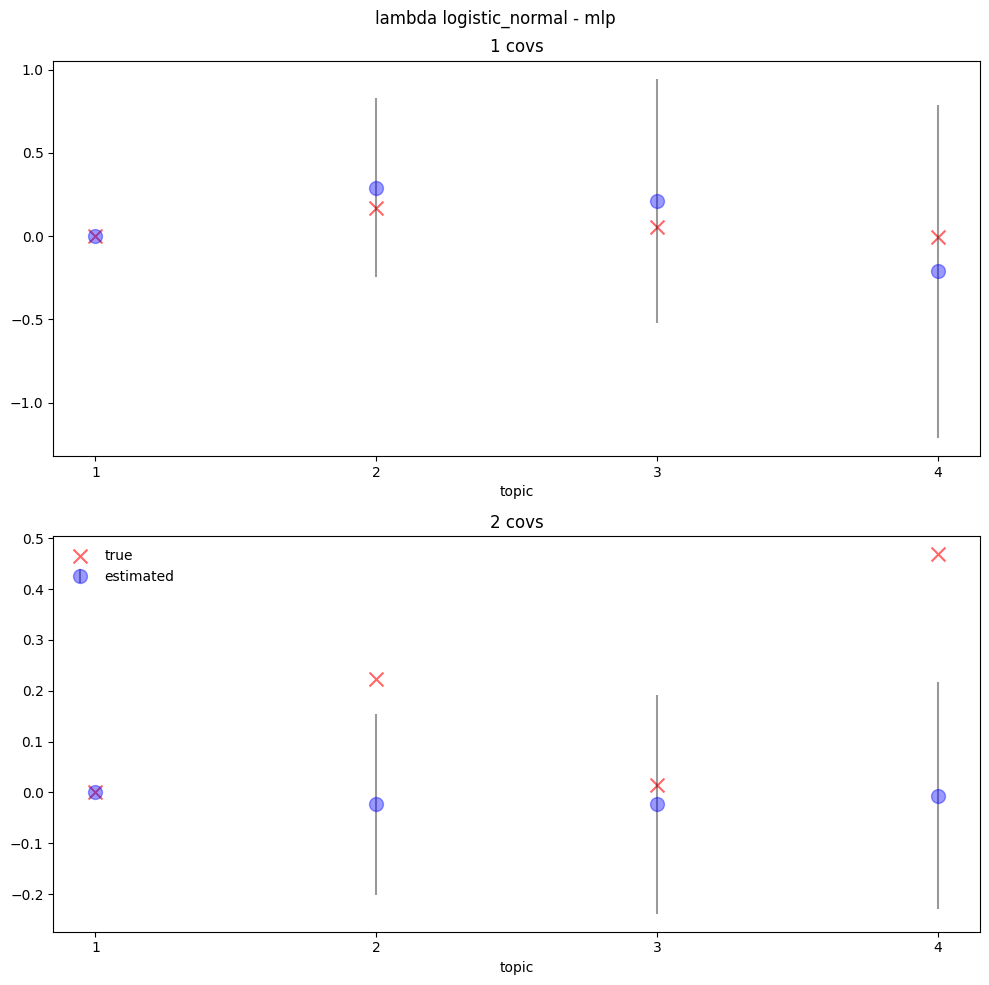

In [5]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
fig.suptitle('lambda {} - {}'.format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
for i in range(doc_args["num_content_covs"]):
    ax = fig.add_subplot(doc_args["num_content_covs"], 1, i+1,xlabel="topic")
    true_lambda = true_lambda_[i]
    df_estimated_lambda = pd.DataFrame([estimated_lambda_list[j][i] for j in range(num_iters)])
    x = np.array([t+1 for t in range(num_topics)])
    mean = df_estimated_lambda.mean(axis=0)
    std = df_estimated_lambda.std(axis=0)
    ax.errorbar(x, mean, yerr=std,fmt='o', markersize=10, ecolor='black', markeredgecolor= "blue", color='b',label="estimated",alpha=0.4)
    ax.scatter(x,true_lambda, marker='x', s=100, color="red", label="true",alpha=0.6)
    ax.set_xticks([t+1 for t in range(num_topics)])
    ax.set_title("{} covs".format(i+1))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.legend(framealpha=0)
plt.subplots_adjust(hspace=0.4)
plt.show()

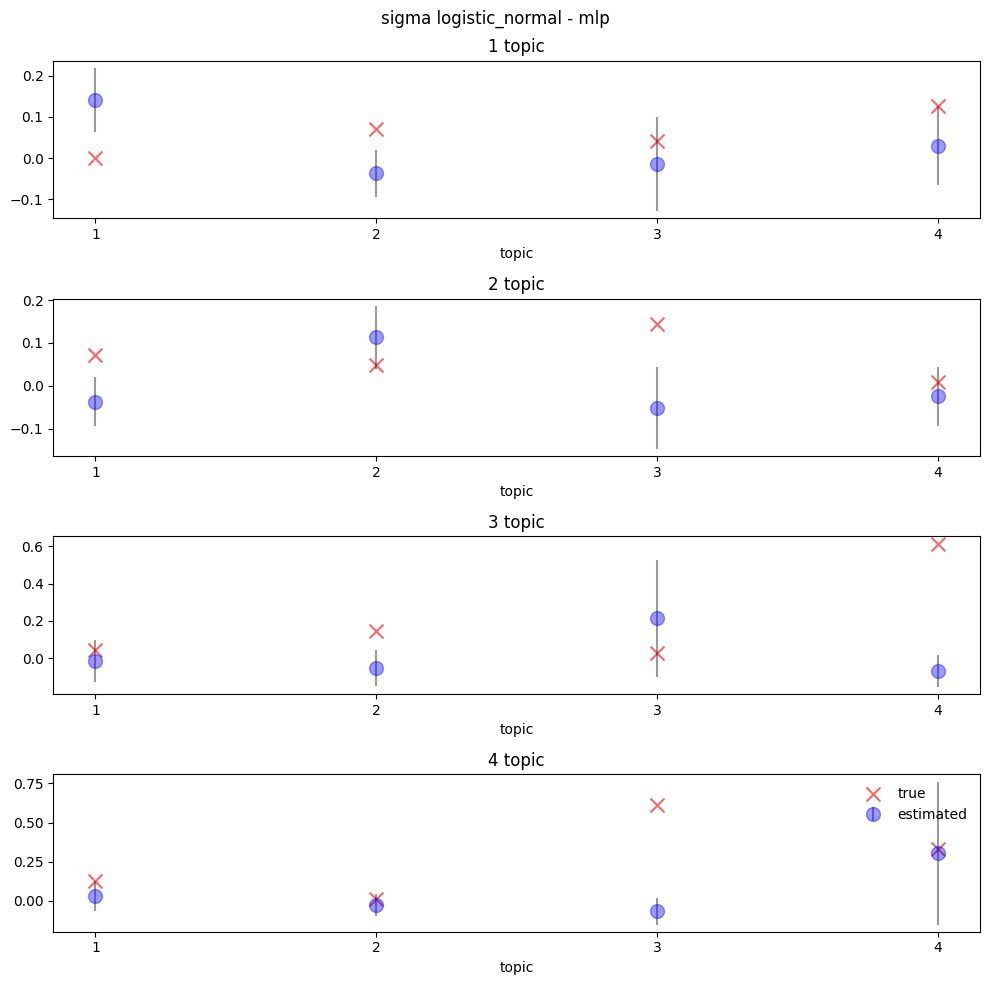

In [13]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
fig.suptitle('sigma {} - {}'.format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
for i in range(num_topics):
    ax = fig.add_subplot(num_topics, 1, i+1,xlabel="topic")
    true_sigma_i = true_sigma[i]
    df_estimated_sigma = pd.DataFrame([estimated_sigma_list[j][i] for j in range(num_iters)])
    x = np.array([t+1 for t in range(num_topics)])
    mean = df_estimated_sigma.mean(axis=0)
    std = df_estimated_sigma.std(axis=0)
    ax.errorbar(x, mean, yerr=std,fmt='o', markersize=10, ecolor='black', markeredgecolor= "blue", color='b',label="estimated",alpha=0.4)
    ax.scatter(x,true_sigma_i, marker='x', s=100, color="red", label="true",alpha=0.6)
    ax.set_xticks([t+1 for t in range(num_topics)])
    ax.set_title("{} topic".format(i+1))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.legend(framealpha=0)
plt.subplots_adjust(hspace=0.4)
plt.show()

#### dirichlet_sage (update=False)
- this combination performed really bad

#### logisticnorm_sage (update=True)

In [14]:
num_topics = 4
num_iters = 10
seed = 0
np.random.seed(seed)
doc_args = {
    "num_content_covs": 2,
    "num_prev_covs": 2,
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
}
gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "logistic_normal",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        # "seed":seed
        }

### setting the true_lambda
true_lambda_ = np.random.rand(doc_args["num_content_covs"], num_topics)
true_lambda_ = true_lambda_ - true_lambda_[:, 0][:, None]

sqrt_sigma = np.random.rand(num_topics, num_topics)
true_sigma = sqrt_sigma * sqrt_sigma.T


### generating docs

print("generate docs")
df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
    num_topics=num_topics,
    doc_topic_prior=gtm_model_args["doc_topic_prior"],
    decoder_type=gtm_model_args["decoder_type"],
    seed=seed,
    update_prior=gtm_model_args["update_prior"],
    lambda_=true_lambda_,
    sigma=true_sigma,
    doc_args=doc_args,
    is_output=False,
)
print()
print("estimate lambda, sigma")
estimated_lambda_list = []
estimated_sigma_list = []
for i in tqdm(range(num_iters)):
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    gtm_model_args["seed"] = i
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    estimated_lambda_list.append(tm_test.prior.lambda_)
    estimated_sigma_list.append(tm_test.prior.sigma)
    if i % 10 == 0:
        print("finished {} epochs".format(i))
# mean_estimated_lambda = np.mean(estimated_lambda_list, axis=0)

generate docs


100%|██████████| 5000/5000 [01:04<00:00, 77.40it/s]



estimate lambda, sigma


  0%|          | 0/10 [00:00<?, ?it/s]


Epoch   1	Mean Training Loss:5.4930913

Topic_0: ['word_354', 'word_985', 'word_912', 'word_462', 'word_983']
Topic_1: ['word_912', 'word_354', 'word_430', 'word_37', 'word_340']
Topic_2: ['word_983', 'word_781', 'word_209', 'word_32', 'word_270']
Topic_3: ['word_912', 'word_985', 'word_103', 'word_781', 'word_983']
Intercept: ['word_781', 'word_32', 'word_354', 'word_912', 'word_983']
content: ['word_764', 'word_292', 'word_983', 'word_781', 'word_549']



Epoch   2	Mean Training Loss:0.9588159

Topic_0: ['word_354', 'word_781', 'word_985', 'word_912', 'word_430']
Topic_1: ['word_354', 'word_781', 'word_912', 'word_430', 'word_985']
Topic_2: ['word_781', 'word_983', 'word_292', 'word_549', 'word_354']
Topic_3: ['word_781', 'word_985', 'word_912', 'word_354', 'word_983']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_764', 'word_292', 'word_549', 'word_983', 'word_781']



Epoch   3	Mean Training Loss:0.7321909

Topic_0: ['word_354', 'word_781',

 10%|█         | 1/10 [04:21<39:17, 261.95s/it]

finished 0 epochs

Epoch   1	Mean Training Loss:5.1709221

Topic_0: ['word_736', 'word_254', 'word_571', 'word_398', 'word_452']
Topic_1: ['word_781', 'word_985', 'word_354', 'word_983', 'word_912']
Topic_2: ['word_354', 'word_781', 'word_32', 'word_912', 'word_110']
Topic_3: ['word_781', 'word_292', 'word_983', 'word_764', 'word_32']
Intercept: ['word_354', 'word_781', 'word_983', 'word_912', 'word_32']
content: ['word_781', 'word_549', 'word_292', 'word_764', 'word_983']



Epoch   2	Mean Training Loss:0.9311566

Topic_0: ['word_781', 'word_32', 'word_354', 'word_736', 'word_764']
Topic_1: ['word_781', 'word_354', 'word_985', 'word_983', 'word_912']
Topic_2: ['word_354', 'word_781', 'word_32', 'word_430', 'word_985']
Topic_3: ['word_781', 'word_983', 'word_292', 'word_764', 'word_549']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_549', 'word_787', 'word_764', 'word_292', 'word_983']



Epoch   3	Mean Training Loss:0.7398874

Topic_0: ['word_7

 20%|██        | 2/10 [09:08<36:52, 276.50s/it]


Epoch   1	Mean Training Loss:1.9604523

Topic_0: ['word_781', 'word_32', 'word_354', 'word_983', 'word_292']
Topic_1: ['word_354', 'word_292', 'word_781', 'word_912', 'word_983']
Topic_2: ['word_292', 'word_983', 'word_781', 'word_103', 'word_764']
Topic_3: ['word_985', 'word_781', 'word_354', 'word_32', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_292', 'word_983', 'word_764', 'word_549', 'word_787']



Epoch   2	Mean Training Loss:0.7918700

Topic_0: ['word_781', 'word_32', 'word_354', 'word_292', 'word_983']
Topic_1: ['word_354', 'word_781', 'word_983', 'word_430', 'word_912']
Topic_2: ['word_781', 'word_983', 'word_292', 'word_103', 'word_764']
Topic_3: ['word_781', 'word_354', 'word_985', 'word_32', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_787', 'word_764', 'word_292', 'word_549', 'word_983']



Epoch   3	Mean Training Loss:0.7356890

Topic_0: ['word_781', 'word_32', 'w

 30%|███       | 3/10 [13:59<33:02, 283.26s/it]


Epoch   1	Mean Training Loss:3.4241096

Topic_0: ['word_781', 'word_983', 'word_354', 'word_985', 'word_103']
Topic_1: ['word_983', 'word_781', 'word_103', 'word_32', 'word_292']
Topic_2: ['word_354', 'word_781', 'word_912', 'word_983', 'word_985']
Topic_3: ['word_354', 'word_539', 'word_980', 'word_668', 'word_563']
Intercept: ['word_781', 'word_354', 'word_912', 'word_32', 'word_983']
content: ['word_292', 'word_764', 'word_983', 'word_549', 'word_787']



Epoch   2	Mean Training Loss:0.9232917

Topic_0: ['word_781', 'word_983', 'word_354', 'word_103', 'word_985']
Topic_1: ['word_781', 'word_983', 'word_103', 'word_292', 'word_549']
Topic_2: ['word_781', 'word_354', 'word_912', 'word_983', 'word_985']
Topic_3: ['word_354', 'word_430', 'word_781', 'word_985', 'word_417']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_764', 'word_787', 'word_292', 'word_549', 'word_983']



Epoch   3	Mean Training Loss:0.7333178

Topic_0: ['word_781', 'word_983'

 40%|████      | 4/10 [18:55<28:49, 288.19s/it]


Epoch   1	Mean Training Loss:2.4079178

Topic_0: ['word_983', 'word_781', 'word_32', 'word_764', 'word_549']
Topic_1: ['word_781', 'word_983', 'word_764', 'word_549', 'word_912']
Topic_2: ['word_781', 'word_985', 'word_354', 'word_912', 'word_292']
Topic_3: ['word_354', 'word_32', 'word_781', 'word_912', 'word_985']
Intercept: ['word_781', 'word_354', 'word_32', 'word_983', 'word_985']
content: ['word_781', 'word_764', 'word_292', 'word_983', 'word_549']



Epoch   2	Mean Training Loss:0.9025728

Topic_0: ['word_781', 'word_983', 'word_354', 'word_32', 'word_764']
Topic_1: ['word_781', 'word_983', 'word_764', 'word_549', 'word_292']
Topic_2: ['word_781', 'word_354', 'word_985', 'word_912', 'word_103']
Topic_3: ['word_354', 'word_781', 'word_983', 'word_32', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_985']
content: ['word_781', 'word_292', 'word_764', 'word_983', 'word_549']



Epoch   3	Mean Training Loss:0.7576551

Topic_0: ['word_781', 'word_32', '

 50%|█████     | 5/10 [23:32<23:40, 284.16s/it]


Epoch   1	Mean Training Loss:6.7482165

Topic_0: ['word_354', 'word_781', 'word_985', 'word_430', 'word_32']
Topic_1: ['word_493', 'word_238', 'word_781', 'word_175', 'word_989']
Topic_2: ['word_781', 'word_32', 'word_983', 'word_764', 'word_292']
Topic_3: ['word_983', 'word_912', 'word_32', 'word_354', 'word_985']
Intercept: ['word_354', 'word_781', 'word_983', 'word_912', 'word_32']
content: ['word_292', 'word_781', 'word_549', 'word_983', 'word_764']



Epoch   2	Mean Training Loss:1.0063689

Topic_0: ['word_354', 'word_781', 'word_985', 'word_32', 'word_983']
Topic_1: ['word_781', 'word_354', 'word_493', 'word_430', 'word_32']
Topic_2: ['word_781', 'word_983', 'word_292', 'word_764', 'word_549']
Topic_3: ['word_354', 'word_983', 'word_781', 'word_985', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_292', 'word_549', 'word_781', 'word_983', 'word_764']



Epoch   3	Mean Training Loss:0.7148080

Topic_0: ['word_354', 'word_781', 'w

 60%|██████    | 6/10 [28:02<18:36, 279.23s/it]


Epoch   1	Mean Training Loss:2.3173474

Topic_0: ['word_292', 'word_781', 'word_983', 'word_103', 'word_764']
Topic_1: ['word_912', 'word_781', 'word_983', 'word_354', 'word_549']
Topic_2: ['word_985', 'word_781', 'word_354', 'word_32', 'word_103']
Topic_3: ['word_781', 'word_354', 'word_103', 'word_549', 'word_292']
Intercept: ['word_354', 'word_781', 'word_912', 'word_983', 'word_32']
content: ['word_549', 'word_983', 'word_764', 'word_292', 'word_781']



Epoch   2	Mean Training Loss:0.8475032

Topic_0: ['word_781', 'word_292', 'word_983', 'word_787', 'word_764']
Topic_1: ['word_354', 'word_781', 'word_912', 'word_462', 'word_983']
Topic_2: ['word_354', 'word_781', 'word_32', 'word_985', 'word_430']
Topic_3: ['word_781', 'word_354', 'word_103', 'word_983', 'word_292']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_549', 'word_764', 'word_983', 'word_292', 'word_787']



Epoch   3	Mean Training Loss:0.7055779

Topic_0: ['word_292', 'word_781',

 70%|███████   | 7/10 [32:29<13:46, 275.39s/it]


Epoch   1	Mean Training Loss:2.7630657

Topic_0: ['word_292', 'word_32', 'word_354', 'word_912', 'word_985']
Topic_1: ['word_32', 'word_354', 'word_781', 'word_764', 'word_430']
Topic_2: ['word_103', 'word_983', 'word_354', 'word_781', 'word_292']
Topic_3: ['word_781', 'word_983', 'word_764', 'word_354', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_983', 'word_549', 'word_764', 'word_292', 'word_781']



Epoch   2	Mean Training Loss:0.8312585

Topic_0: ['word_32', 'word_354', 'word_292', 'word_912', 'word_781']
Topic_1: ['word_781', 'word_354', 'word_32', 'word_983', 'word_430']
Topic_2: ['word_354', 'word_781', 'word_983', 'word_103', 'word_985']
Topic_3: ['word_781', 'word_983', 'word_354', 'word_764', 'word_292']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_985']
content: ['word_787', 'word_549', 'word_764', 'word_292', 'word_983']



Epoch   3	Mean Training Loss:0.7211909

Topic_0: ['word_32', 'word_354', '

 80%|████████  | 8/10 [36:52<09:02, 271.48s/it]


Epoch   1	Mean Training Loss:2.5885575

Topic_0: ['word_781', 'word_32', 'word_983', 'word_292', 'word_354']
Topic_1: ['word_983', 'word_781', 'word_354', 'word_985', 'word_549']
Topic_2: ['word_354', 'word_781', 'word_985', 'word_912', 'word_32']
Topic_3: ['word_32', 'word_983', 'word_781', 'word_354', 'word_430']
Intercept: ['word_354', 'word_781', 'word_983', 'word_292', 'word_32']
content: ['word_292', 'word_983', 'word_781', 'word_549', 'word_764']



Epoch   2	Mean Training Loss:0.8156409

Topic_0: ['word_781', 'word_983', 'word_292', 'word_32', 'word_354']
Topic_1: ['word_781', 'word_354', 'word_983', 'word_549', 'word_985']
Topic_2: ['word_354', 'word_781', 'word_985', 'word_32', 'word_912']
Topic_3: ['word_781', 'word_32', 'word_983', 'word_354', 'word_430']
Intercept: ['word_781', 'word_354', 'word_983', 'word_912', 'word_32']
content: ['word_292', 'word_549', 'word_764', 'word_787', 'word_983']



Epoch   3	Mean Training Loss:0.7211790

Topic_0: ['word_781', 'word_983', 'wo

 90%|█████████ | 9/10 [41:23<04:31, 271.26s/it]


Epoch   1	Mean Training Loss:4.6554612

Topic_0: ['word_354', 'word_515', 'word_262', 'word_182', 'word_457']
Topic_1: ['word_781', 'word_292', 'word_764', 'word_549', 'word_983']
Topic_2: ['word_781', 'word_354', 'word_103', 'word_985', 'word_292']
Topic_3: ['word_354', 'word_985', 'word_430', 'word_912', 'word_781']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_764', 'word_549', 'word_983', 'word_292', 'word_781']



Epoch   2	Mean Training Loss:0.9148514

Topic_0: ['word_781', 'word_354', 'word_32', 'word_983', 'word_417']
Topic_1: ['word_781', 'word_983', 'word_292', 'word_764', 'word_549']
Topic_2: ['word_354', 'word_781', 'word_462', 'word_103', 'word_292']
Topic_3: ['word_354', 'word_781', 'word_985', 'word_430', 'word_912']
Intercept: ['word_781', 'word_354', 'word_983', 'word_32', 'word_912']
content: ['word_549', 'word_764', 'word_292', 'word_983', 'word_787']



Epoch   3	Mean Training Loss:0.7296284

Topic_0: ['word_32', 'word_781',

100%|██████████| 10/10 [52:10<00:00, 313.05s/it]


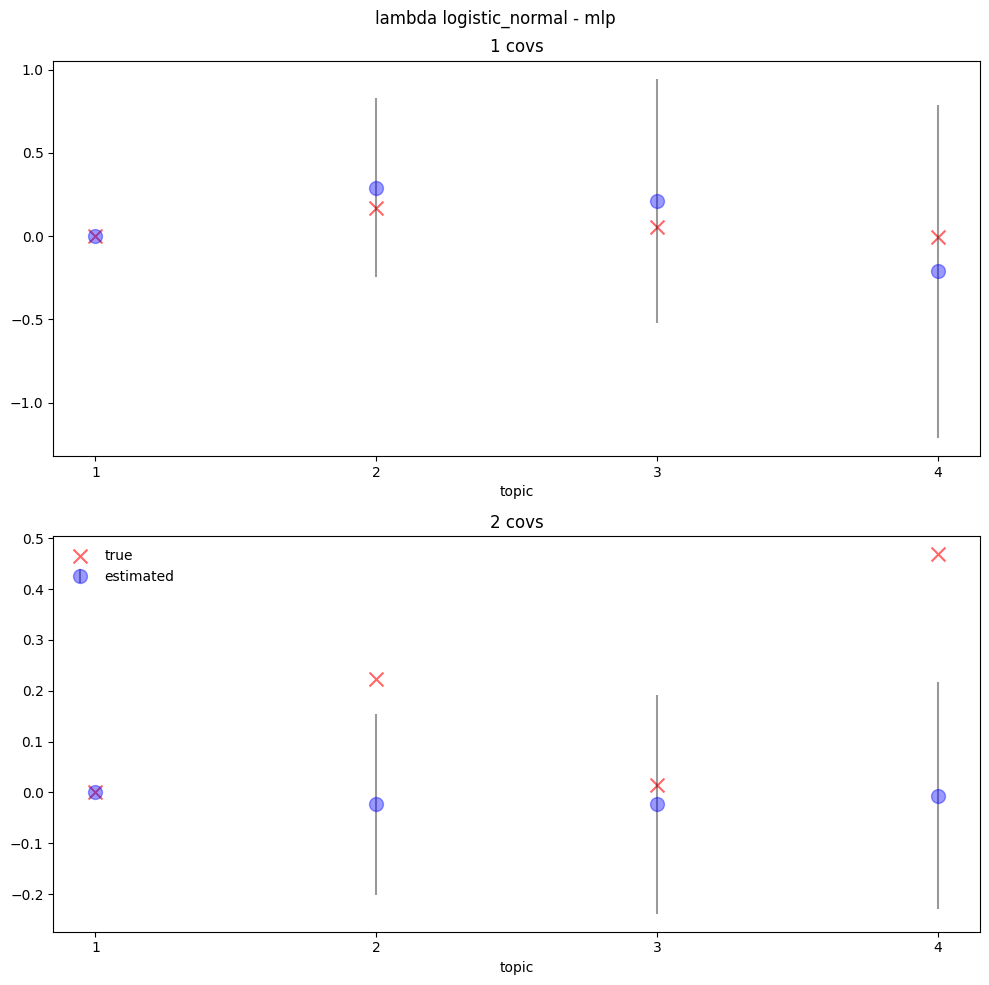

In [15]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
fig.suptitle('lambda {} - {}'.format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
for i in range(doc_args["num_content_covs"]):
    ax = fig.add_subplot(doc_args["num_content_covs"], 1, i+1,xlabel="topic")
    true_lambda = true_lambda_[i]
    df_estimated_lambda = pd.DataFrame([estimated_lambda_list[j][i] for j in range(num_iters)])
    x = np.array([t+1 for t in range(num_topics)])
    mean = df_estimated_lambda.mean(axis=0)
    std = df_estimated_lambda.std(axis=0)
    ax.errorbar(x, mean, yerr=std,fmt='o', markersize=10, ecolor='black', markeredgecolor= "blue", color='b',label="estimated",alpha=0.4)
    ax.scatter(x,true_lambda, marker='x', s=100, color="red", label="true",alpha=0.6)
    ax.set_xticks([t+1 for t in range(num_topics)])
    ax.set_title("{} covs".format(i+1))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.legend(framealpha=0)
plt.subplots_adjust(hspace=0.4)
plt.show()

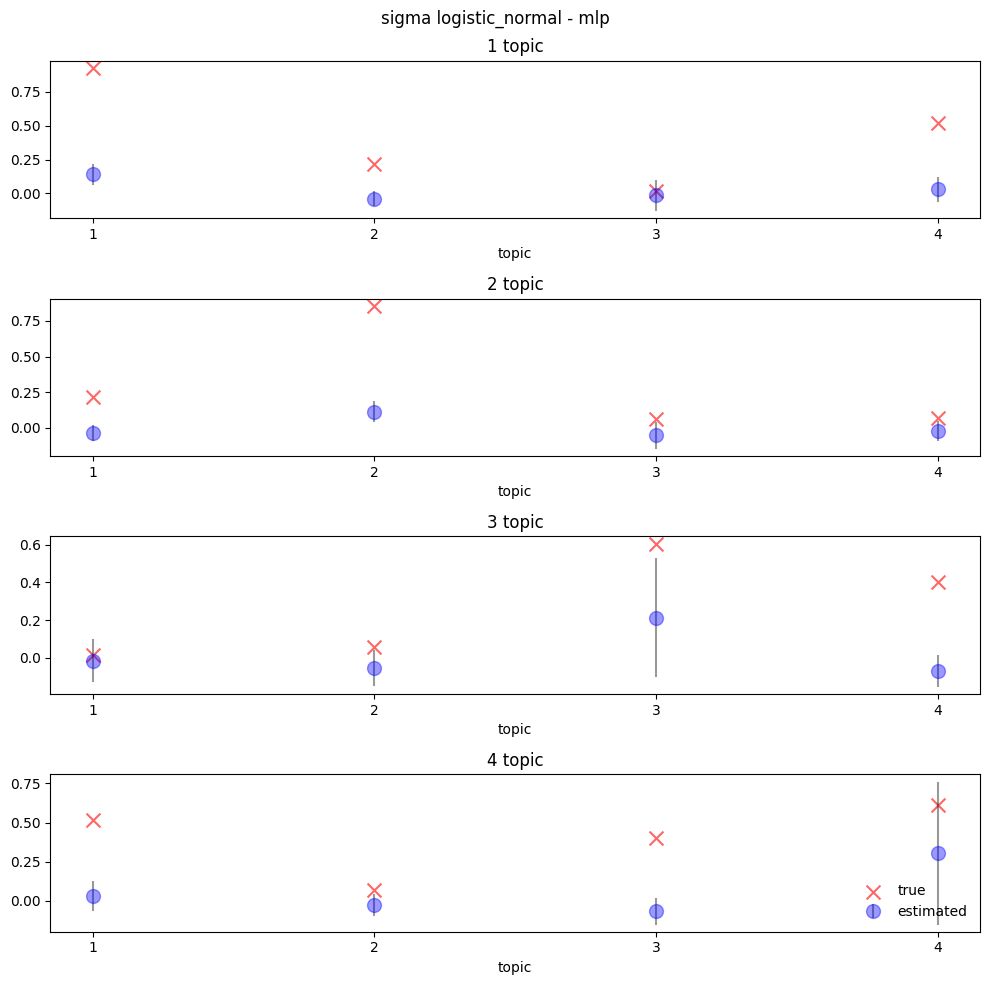

In [16]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
fig.suptitle('sigma {} - {}'.format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
for i in range(num_topics):
    ax = fig.add_subplot(num_topics, 1, i+1,xlabel="topic")
    true_sigma_i = true_sigma[i]
    df_estimated_sigma = pd.DataFrame([estimated_sigma_list[j][i] for j in range(num_iters)])
    x = np.array([t+1 for t in range(num_topics)])
    mean = df_estimated_sigma.mean(axis=0)
    std = df_estimated_sigma.std(axis=0)
    ax.errorbar(x, mean, yerr=std,fmt='o', markersize=10, ecolor='black', markeredgecolor= "blue", color='b',label="estimated",alpha=0.4)
    ax.scatter(x,true_sigma_i, marker='x', s=100, color="red", label="true",alpha=0.6)
    ax.set_xticks([t+1 for t in range(num_topics)])
    ax.set_title("{} topic".format(i+1))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.legend(framealpha=0)
plt.subplots_adjust(hspace=0.4)
plt.show()